In [9]:
import pandas as pd
import mysql.connector

# Establish a connection to the MySQL database
try:
    connection = mysql.connector.connect(
        host='localhost',          # e.g., 'localhost' or '127.0.0.1'
        user='root',      # your MySQL username
        password='Arogundade',  # your MySQL password
        database='studentperformancedb'  # the name of your database
    )

    # Check if the connection was successful
    if connection.is_connected():
        print("Successfully connected to the database")

    # Query the data
    query = "SELECT * FROM studentperformance;"
    df = pd.read_sql(query, connection)

    # Save to CSV
    df.to_csv('studentperformancedb.csv', index=False)
    print("Data saved to studentperformancedb.csv")

except mysql.connector.Error as err:
    print(f"Error: {err}")

finally:
    # Close the connection
    if 'connection' in locals() and connection.is_connected():
        connection.close()
        print("Database connection closed.")


Successfully connected to the database


C:\Users\Sukanmi\AppData\Local\Temp\ipykernel_15848\2197244276.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


Data saved to studentperformancedb.csv
Database connection closed.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\Sukanmi\Desktop\segun\important\mysql work portfolio\studentperformancedb.csv')
df.head()

,id,gender,race_ethnicity,math_score,reading_score,writting_score
0,1,Male,Igbo,16,36,30
1,2,Female,Hausa,29,49,55
2,3,Female,Igbo,36,35,67
3,4,Female,Igbo,99,87,37
4,5,Female,Hausa,0,58,87


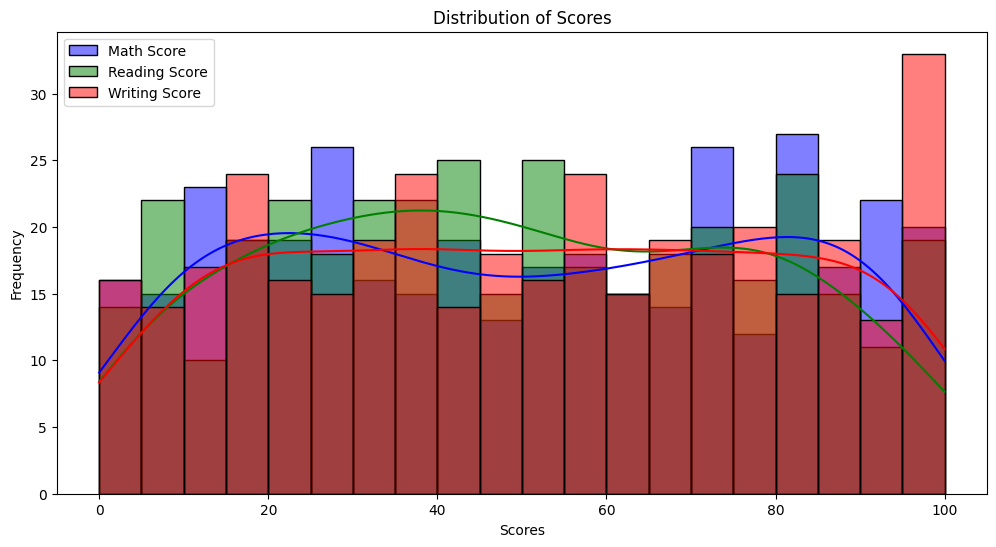

Missing Values: id                0
gender            0
race_ethnicity    0
math_score        0
reading_score     0
writting_score    0
dtype: int64
Summary Statistics:                id  math_score  reading_score  writting_score
count  369.000000  369.000000     369.000000      369.000000
mean   185.000000   50.387534      49.005420       51.382114
std    106.665365   29.513150      27.743487       29.225748
min      1.000000    0.000000       0.000000        0.000000
25%     93.000000   25.000000      26.000000       27.000000
50%    185.000000   51.000000      48.000000       51.000000
75%    277.000000   77.000000      73.000000       77.000000
max    369.000000  100.000000     100.000000      100.000000


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
missing_values = df.isnull().sum()

# Summary statistics
summary_stats = df.describe()

# Visualize the distribution of scores
plt.figure(figsize=(12, 6))
sns.histplot(df['math_score'], kde=True, color='blue', label='Math Score', bins=20)
sns.histplot(df['reading_score'], kde=True, color='green', label='Reading Score', bins=20)
sns.histplot(df['writting_score'], kde=True, color='red', label='Writing Score', bins=20)
plt.legend()
plt.title('Distribution of Scores')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.show()

# Correlation matrix
#correlation_matrix = df.corr()

# Visualize the correlation matrix
#plt.figure(figsize=(8, 6))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
#plt.title('Correlation Matrix')
#plt.show()

print('Missing Values:', missing_values)
print('Summary Statistics:', summary_stats)

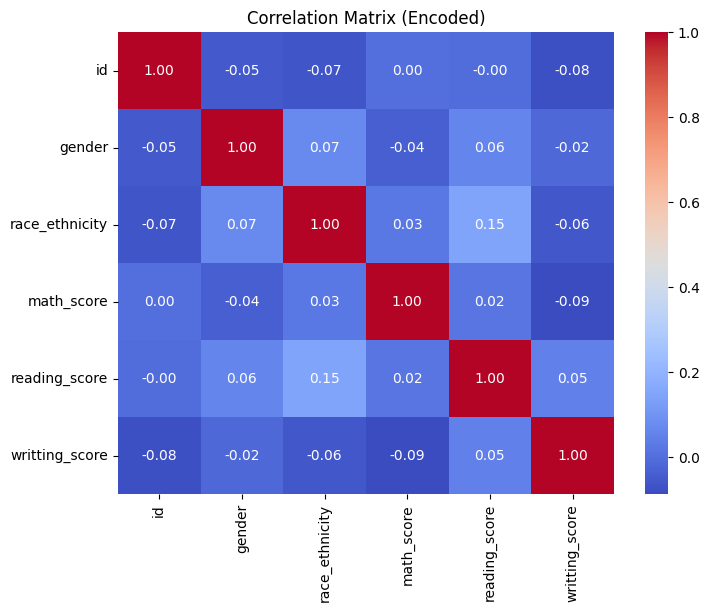

In [15]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataframe to avoid modifying the original
encoded_df = df.copy()

# Encode 'gender' and 'race_ethnicity'
label_encoder = LabelEncoder()
encoded_df['gender'] = label_encoder.fit_transform(encoded_df['gender'])
encoded_df['race_ethnicity'] = label_encoder.fit_transform(encoded_df['race_ethnicity'])

# Recalculate the correlation matrix
correlation_matrix_encoded = encoded_df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Encoded)')
plt.show()

id                0
gender            0
race_ethnicity    0
math_score        0
reading_score     0
writting_score    0
dtype: int64
               id  math_score  reading_score  writting_score
count  369.000000  369.000000     369.000000      369.000000
mean   185.000000   50.387534      49.005420       51.382114
std    106.665365   29.513150      27.743487       29.225748
min      1.000000    0.000000       0.000000        0.000000
25%     93.000000   25.000000      26.000000       27.000000
50%    185.000000   51.000000      48.000000       51.000000
75%    277.000000   77.000000      73.000000       77.000000
max    369.000000  100.000000     100.000000      100.000000


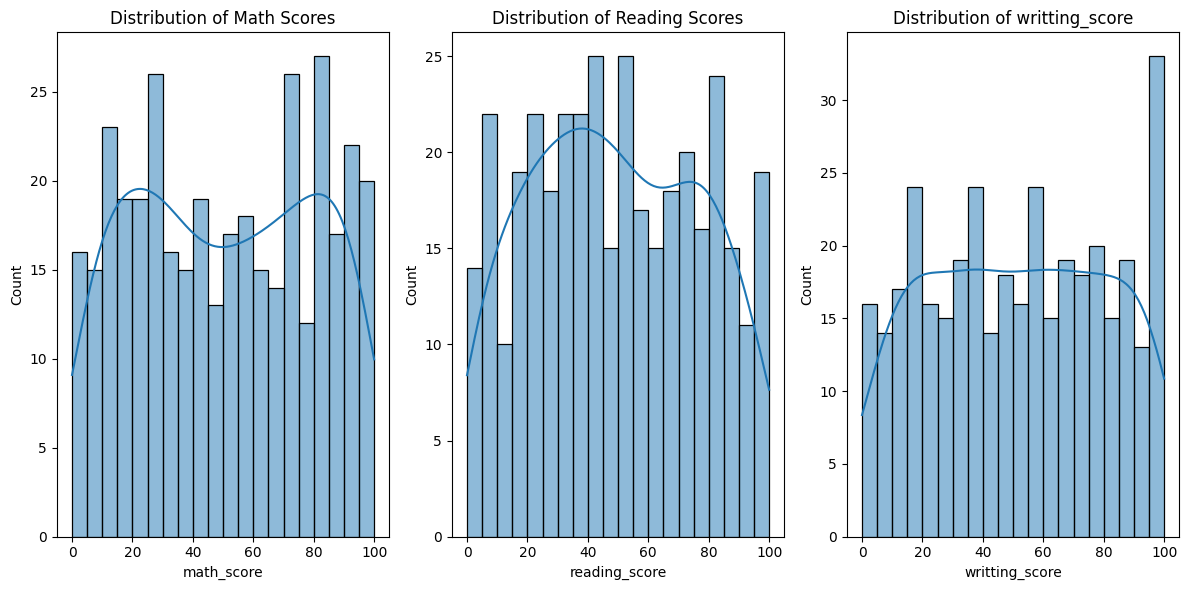

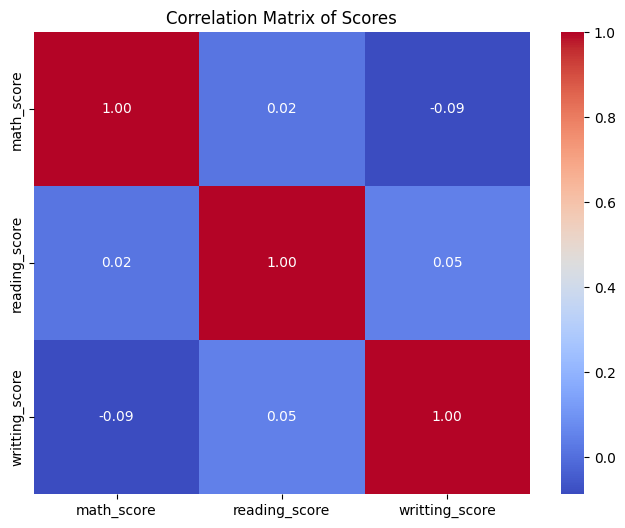

In [18]:
# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

# Visualize the distribution of scores
plt.figure(figsize=(12, 6))

# Math scores distribution
plt.subplot(1, 3, 1)
sns.histplot(df['math_score'], bins=20, kde=True)
plt.title('Distribution of Math Scores')

# Reading scores distribution
plt.subplot(1, 3, 2)
sns.histplot(df['reading_score'], bins=20, kde=True)
plt.title('Distribution of Reading Scores')

# Writting scores distribution
plt.subplot(1, 3, 3)
sns.histplot(df['writting_score'], bins=20, kde=True)
plt.title('Distribution of writting_score')

plt.tight_layout()
plt.show()

# Correlation matrix
correlation = df[['math_score', 'reading_score', 'writting_score']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Scores')
plt.show()


In [20]:
# Group by gender and calculate mean scores
gender_analysis = df.groupby('gender')[['math_score', 'reading_score', 'writting_score']].mean()
print(gender_analysis)

# Group by race/ethnicity and calculate mean scores
ethnicity_analysis = df.groupby('race_ethnicity')[['math_score', 'reading_score', 'writting_score']].mean()
print(ethnicity_analysis)


        math_score  reading_score  writting_score
gender                                           
Female   51.467033      47.373626       51.901099
Male     49.336898      50.593583       50.877005
                math_score  reading_score  writting_score
race_ethnicity                                           
Hausa            51.546154      43.807692       53.292308
Igbo             47.243750      50.500000       51.287500
Yourba           54.848101      54.531646       48.430380


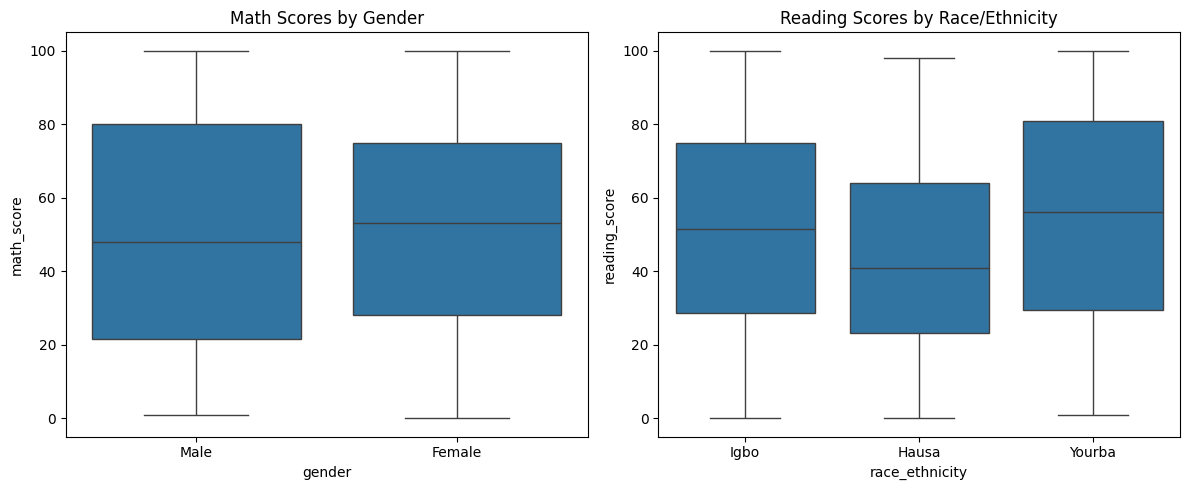

In [24]:
plt.figure(figsize=(12, 5))

# Box plot for math scores by gender
plt.subplot(1, 2, 1)
sns.boxplot(x='gender', y='math_score', data=df)  # Corrected here
plt.title('Math Scores by Gender')

# Box plot for reading scores by race/ethnicity
plt.subplot(1, 2, 2)
sns.boxplot(x='race_ethnicity', y='reading_score', data=df)  # Corrected here
plt.title('Reading Scores by Race/Ethnicity')

plt.tight_layout()
plt.show()


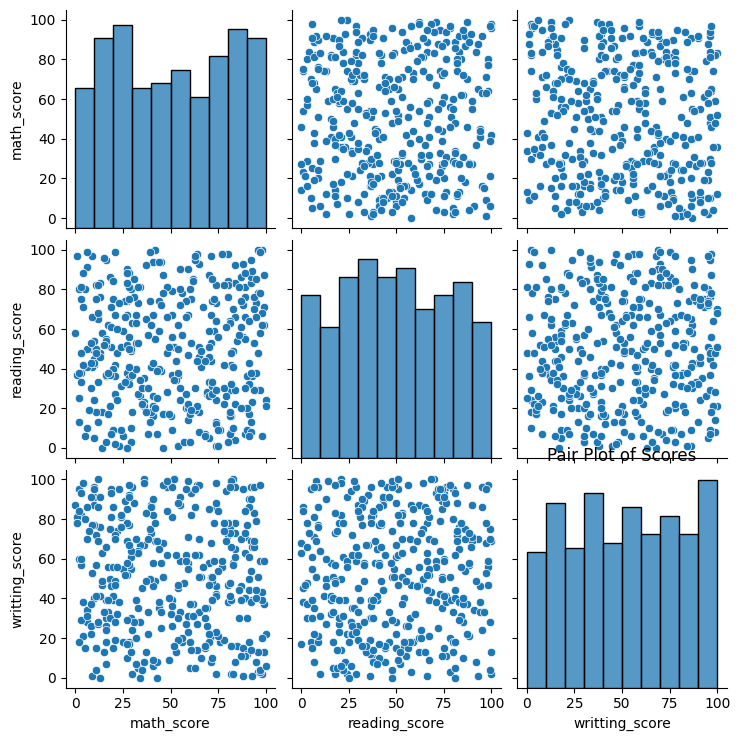

In [22]:
sns.pairplot(df[['math_score', 'reading_score', 'writting_score']])
plt.title('Pair Plot of Scores')
plt.show()


In [23]:
Q1 = df[['math_score', 'reading_score', 'writting_score']].quantile(0.25)
Q3 = df[['math_score', 'reading_score', 'writting_score']].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df[['math_score', 'reading_score', 'writting_score']] < (Q1 - 1.5 * IQR)) | 
                (df[['math_score', 'reading_score', 'writting_score']] > (Q3 + 1.5 * IQR))]
print(outliers)

     id gender race_ethnicity  math_score  reading_score  writting_score
0   NaN    NaN            NaN         NaN            NaN             NaN
1   NaN    NaN            NaN         NaN            NaN             NaN
2   NaN    NaN            NaN         NaN            NaN             NaN
3   NaN    NaN            NaN         NaN            NaN             NaN
4   NaN    NaN            NaN         NaN            NaN             NaN
..   ..    ...            ...         ...            ...             ...
364 NaN    NaN            NaN         NaN            NaN             NaN
365 NaN    NaN            NaN         NaN            NaN             NaN
366 NaN    NaN            NaN         NaN            NaN             NaN
367 NaN    NaN            NaN         NaN            NaN             NaN
368 NaN    NaN            NaN         NaN            NaN             NaN

[369 rows x 6 columns]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Sukanmi\AppData\Local\Temp\ipykernel_15848\2898851459.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)  # Fill with the mode


Mean Absolute Error: 28.385890979534334
R-squared: 0.021464014357354455


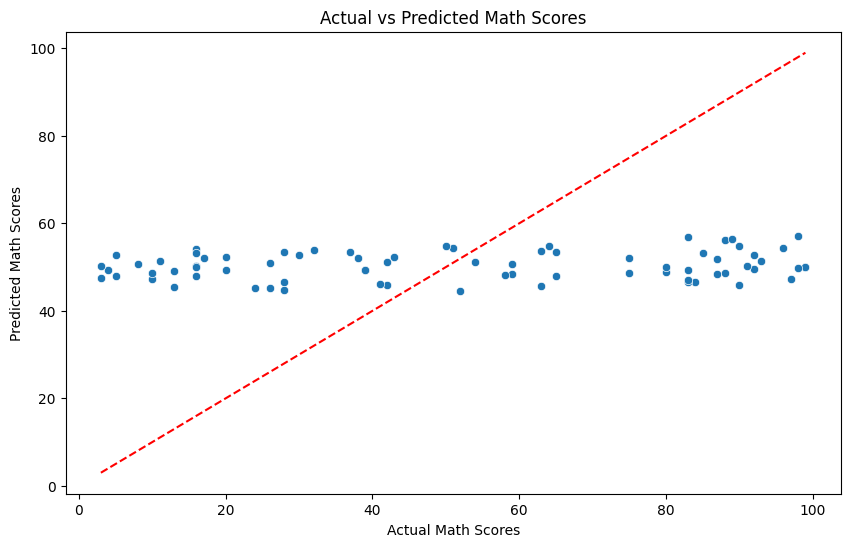

In [27]:
# Preprocess the data
# Handle missing values for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Handle missing values for categorical columns (if any)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)  # Fill with the mode

# Encode categorical variables (if necessary)
df = pd.get_dummies(df, columns=['gender', 'race_ethnicity'], drop_first=True)

# Define features and target variable
X = df.drop(columns=['math_score'])  # Features (excluding the target variable)
y = df['math_score']  # Target variable

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Visualize the predictions
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Math Scores')
plt.ylabel('Predicted Math Scores')
plt.title('Actual vs Predicted Math Scores')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.show()


feature enginer

In [28]:
# Create new features
df['total_score'] = df[['math_score', 'reading_score', 'writting_score']].sum(axis=1)
df['average_score'] = df[['math_score', 'reading_score', 'writting_score']].mean(axis=1)


In [29]:
# Binning math scores
bins = [0, 60, 75, 90, 100]
labels = ['Low', 'Medium', 'High', 'Very High']
df['math_score_category'] = pd.cut(df['math_score'], bins=bins, labels=labels)


In [30]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score


In [34]:
# Assuming df is your DataFrame after feature engineering
# Drop the original categorical columns if they are not needed
df = pd.get_dummies(df, drop_first=True)

# Define features and target variable again after feature engineering
X = df.drop(columns=['math_score'])  # Features
y = df['math_score']  # Target variable

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Train and evaluate each model
from sklearn.metrics import mean_absolute_error, r2_score

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - Mean Absolute Error: {mae}, R-squared: {r2}')


Linear Regression - Mean Absolute Error: 1.4666946336129094e-14, R-squared: 1.0
Random Forest - Mean Absolute Error: 6.144459459459459, R-squared: 0.9366815506572433
Gradient Boosting - Mean Absolute Error: 5.907029452375135, R-squared: 0.9363514224924241


In [32]:
from sklearn.model_selection import GridSearchCV


In [35]:
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Cross-Validation Score: {-grid_search.best_score_}')


Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 50}
Best Cross-Validation Score: 6.9652239827968625


In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load your dataset
# df = pd.read_csv('your_dataset.csv')  # Uncomment and specify your dataset path

# Example preprocessing (make sure to adjust based on your actual dataset)
# df['total_score'] = df[['math_score', 'reading_score', 'writing_score']].sum(axis=1)
# df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)
# df = pd.get_dummies(df, drop_first=True)

# Define features and target variable
X = df.drop(columns=['math_score'])  # Features
y = df['math_score']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - Mean Absolute Error: {mae}, R-squared: {r2}')


Linear Regression - Mean Absolute Error: 1.4666946336129094e-14, R-squared: 1.0
Random Forest - Mean Absolute Error: 5.996891891891892, R-squared: 0.9395396136846186
Gradient Boosting - Mean Absolute Error: 5.974110282880584, R-squared: 0.9336891083704081


In [39]:
# Train the best model with the best parameters
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Get feature importances
importances = best_rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Score: 6.770372881355932


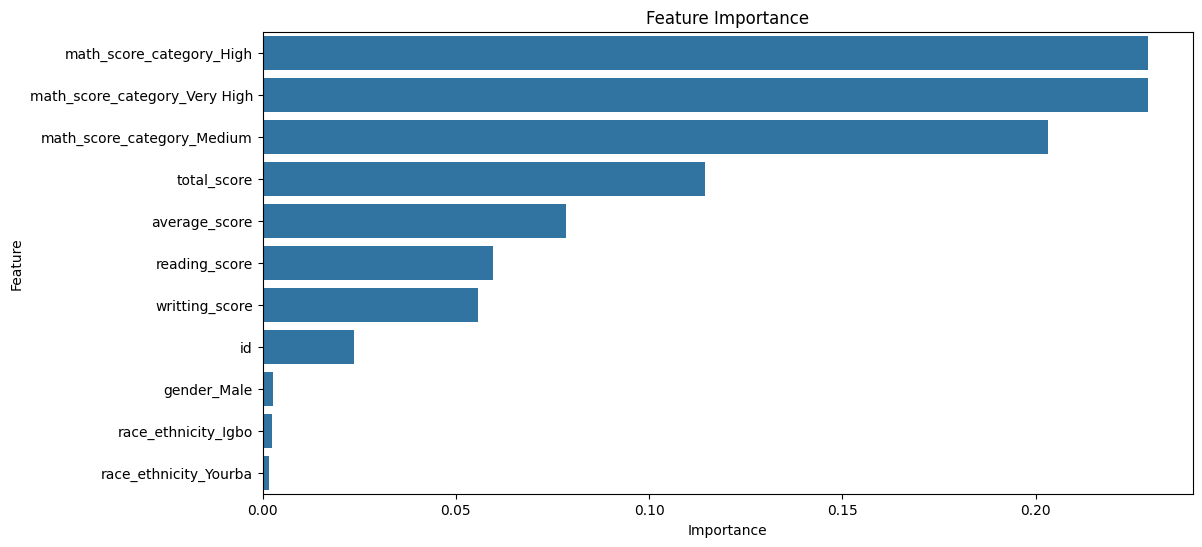

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# df = pd.read_csv('your_dataset.csv')  # Uncomment and specify your dataset path

# Example preprocessing (make sure to adjust based on your actual dataset)
# df['total_score'] = df[['math_score', 'reading_score', 'writing_score']].sum(axis=1)
# df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)
# df = pd.get_dummies(df, drop_first=True)

# Define features and target variable
X = df.drop(columns=['math_score'])  # Features
y = df['math_score']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Check if the fitting was successful
if hasattr(grid_search, 'best_estimator_'):
    print(f'Best Parameters: {grid_search.best_params_}')
    print(f'Best Cross-Validation Score: {-grid_search.best_score_}')

    # Train the best model with the best parameters
    best_rf_model = grid_search.best_estimator_
    best_rf_model.fit(X_train, y_train)

    # Get feature importances
    importances = best_rf_model.feature_importances_
    feature_names = X.columns

    # Create a DataFrame for visualization
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plot feature importances
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title('Feature Importance')
    plt.show()
else:
    print("GridSearchCV did not fit properly. Please check the input data and parameters.")
